# Emotion Detection from Text
### CPCS-433 — Artificial Intelligence Topics  
**Section:** AAR  
**Instructor:** *Dr. Iman Alharbi*  

---

### Group Members
- **Sama Salem Salloum** — *2205679*  
- **Asma Saud Saif** — *2112282*  
- **Shahad Saad Almarzoi** — *2121629*  
- **Dana Khaled Alotaibi** — *2129391*  

---

### Submission Date: 27 Nov 2025


# 0. Setup Environment & Import Libraries

In [ ]:
# Install needed library for stopwords
!pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# English stopwords
stop_words = set(stopwords.words('english'))




#1.   Load Dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the Sentiment140 dataset
# Replace the file name with your actual CSV file
df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",
                 encoding='latin-1', header=None)


df.columns = ["sentiment", "id", "date", "query", "user", "text"]

# Rename columns to readable names
df = df.rename(columns={df.columns[0]: "sentiment", df.columns[5]: "text"})

# Convert sentiment: 0 = negative, 4 = positive → we convert 4 → 1
df['sentiment'] = df['sentiment'].replace({4: 1})

df.head()


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# 2. Preprocessing the Dataset


In [ ]:
# Missing Values
df.isnull().sum()

,0
sentiment,0
id,0
date,0
query,0
user,0
text,0


In [ ]:
# Duplicated Values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Class Balance
df['sentiment'].value_counts()

,count
sentiment,
0,800000
1,800000


# 3. Cleaning the Tweets


In [ ]:
def clean_text(text):
    text = str(text).lower()                                 # convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)      # remove links
    text = re.sub(r"[^a-zA-Z]", " ", text)                   # keep only letters
    words = text.split()                                     # split into words
    words = [w for w in words if w not in stop_words]        # remove stopwords
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

df.head()


,sentiment,id,date,query,user,text,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see


# 4. Splitting the Data


In [ ]:
# Inputs and labels
X = df['clean_text']
y = df['sentiment']

# Split: 80% train – 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 5. TF-IDF Vectorization


In [ ]:
# Convert text to numeric vectors
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# Part 1: Classical Machine Learning Models (Naive Bayes, SVM)


## 1.1 Training Machine Learning Models


### 1.1.1 Training Naive Bayes

In [ ]:
# Train Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

### 1.1.2 Training SVM

In this section, we train a Support Vector Machine (SVM) model using a Linear Support Vector Classifier (LinearSVC).  
SVM is effective for high-dimensional text data such as TF-IDF features and often delivers strong performance in sentiment/emotion classification tasks.

In [ ]:
from sklearn.svm import LinearSVC

# Create and train SVM model
svm_model = LinearSVC(C=1.0, max_iter=3000)
svm_model.fit(X_train_tfidf, y_train)

print("SVM model training completed successfully.")


SVM model training completed successfully.


## 1.2 Testing the Model

###1.2.1 Testing Naive Bayes

1.2.1.1 Accuracy

In [ ]:
# Training Accuracy
nb_train_pred = nb.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, nb_train_pred)
print("Train Accuracy:", train_accuracy)

# Testing Accuracy
nb_test_pred = nb.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, nb_test_pred)
print("Test Accuracy:", test_accuracy)




Train Accuracy: 0.756225
Test Accuracy: 0.754621875


1.2.1.2 Precision, Recall, and F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

nb_precision = precision_score(y_test, nb_test_pred)
nb_recall = recall_score(y_test, nb_test_pred)
nb_f1 = f1_score(y_test, nb_test_pred)

print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1 Score:", nb_f1)


Naive Bayes Precision: 0.7574048840524197
Naive Bayes Recall: 0.7514921560564715
Naive Bayes F1 Score: 0.7544369353169106


1.2.1.3 Confusion Matrix

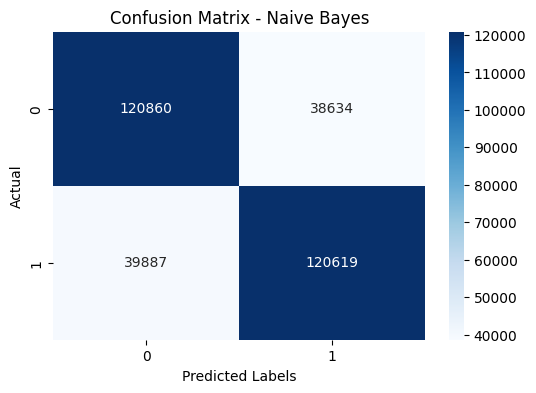

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, nb_test_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1])

plt.xlabel('Predicted Labels')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


### 1.2.2 Testing SVM


#### 1.2.2.1 Accuracy

Below we calculate the training and testing accuracy for the SVM model.


In [ ]:
# Training Accuracy
svm_train_pred = svm_model.predict(X_train_tfidf)
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
print("Train Accuracy:", svm_train_accuracy)

# Testing Accuracy
svm_test_pred = svm_model.predict(X_test_tfidf)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
print("Test Accuracy:", svm_test_accuracy)


Train Accuracy: 0.77050234375
Test Accuracy: 0.76748125


#### 1.2.2.2 Precision, Recall, and F1-Score


Here we compute the evaluation metrics for SVM on the test dataset.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

svm_precision = precision_score(y_test, svm_test_pred)
svm_recall = recall_score(y_test, svm_test_pred)
svm_f1 = f1_score(y_test, svm_test_pred)

print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)


Precision: 0.7541142303969022
Recall: 0.7959577835096507
F1 Score: 0.7744712322455883


#### 1.2.2.3 Confusion Matrix


The confusion matrix below visualizes how well the SVM classifier performed.


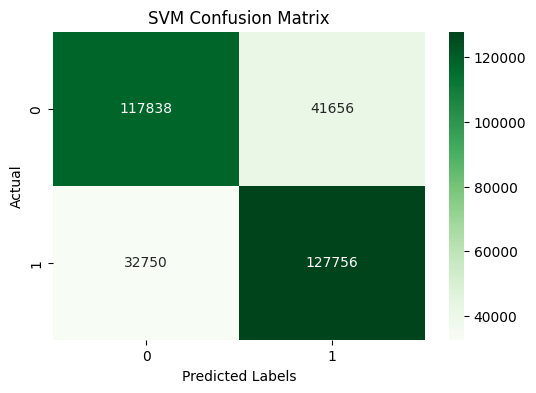

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
svm_cm = confusion_matrix(y_test, svm_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")
plt.show()


# Part 2: Deep Learning Model (LSTM)

###2.1 Text Cleaning

In [ ]:
import nltk
import re
import numpy as np
from nltk.corpus import stopwords

# Download stopwords (run only once)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
    text = str(text).lower()                                  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)       # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)                    # Keep only letters
    words = text.split()                                      # Tokenize
    words = [w for w in words if w not in stop_words]         # Remove stopwords
    return " ".join(words)

# Apply cleaning to the original text column
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot bummer shoulda got david carr third...
1,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see


###2.2 Tokenization

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Maximum number of words to keep in the vocabulary
MAX_WORDS = 50000

# Maximum length for each tweet after padding
MAX_LEN = 50

# Inputs and labels
texts  = df['clean_text'].values
labels = df['sentiment'].values.astype('int32')

# Create Tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert each cleaned tweet to a sequence of numbers
sequences = tokenizer.texts_to_sequences(texts)

print("Example sequence:", sequences[0][:20])
print("Vocabulary size:", len(tokenizer.word_index))

Example sequence: [19229, 1059, 3386, 12, 649, 8997, 1760, 3]
Vocabulary size: 553626


###2.3 Convert Sequences + Apply Padding

In [ ]:
# Pad or truncate sequences to ensure equal length for all tweets
padded_sequences = pad_sequences(
    sequences,
    maxlen=MAX_LEN,
    padding='post',       # Add zeros at the end if too short
    truncating='post'     # Cut from the end if too long
)

print("Padded shape:", padded_sequences.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Padded shape: (1600000, 50)


((1280000, 50), (320000, 50), (1280000,), (320000,))

###2.4 Build the Embedding Layer + LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Vocabulary size used by the embedding layer
vocab_size = min(MAX_WORDS, len(tokenizer.word_index) + 1)

# Embedding dimension (vector size for each word)
EMBEDDING_DIM = 128

# Build the model (not training here – only setup)
lstm_model = Sequential([
    Embedding(
        input_dim=vocab_size,         # Number of words in vocabulary
        output_dim=EMBEDDING_DIM,     # Embedding vector size
        input_shape=(MAX_LEN,)        # Input shape: sequence length
    ),
    LSTM(128, return_sequences=False),  # Main LSTM layer
    Dropout(0.5),                       # Reduce overfitting
    Dense(1, activation='sigmoid')      # Binary output (0 or 1)
])

# Explicitly build the model so summary shows param counts
lstm_model.build((None, MAX_LEN))

# Compile the model (training will be done by Student 4)
lstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 128)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,531,713 (24.92 MB)

 Trainable params: 6,531,713 (24.92 MB)

 Non-trainable params: 0 (0.00 B)

###Train the LSTM Model

In [28]:
history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 323s 10ms/step - accuracy: 0.7139 - loss: 0.5335 - val_accuracy: 0.7888 - val_loss: 0.4469
Epoch 2/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 319s 10ms/step - accuracy: 0.8027 - loss: 0.4280 - val_accuracy: 0.7932 - val_loss: 0.4426
Epoch 3/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 319s 10ms/step - accuracy: 0.8220 - loss: 0.3941 - val_accuracy: 0.7930 - val_loss: 0.4487
Epoch 4/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 318s 10ms/step - accuracy: 0.8395 - loss: 0.3624 - val_accuracy: 0.7883 - val_loss: 0.4521
Epoch 5/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 317s 10ms/step - accuracy: 0.8575 - loss: 0.3276 - val_accuracy: 0.7819 - val_loss: 0.4920
Epoch 6/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 317s 10ms/step - accuracy: 0.8733 - loss: 0.2956 - val_accuracy: 0.7784 - val_loss: 0.5181
Epoch 7/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 319s 10ms/step - accuracy: 0.8867 - loss: 0.2683 - val_accuracy: 0.7715 - val_loss: 0.5647
Epoch 8/10
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 326s 10ms/s

###Evaluate on Test Set

In [29]:
loss, accuracy = lstm_model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.7585 - loss: 0.6871
Test Loss: 0.6874374747276306
Test Accuracy: 0.7590625286102295


###F1 Score

In [30]:
import numpy as np
from sklearn.metrics import f1_score

# Raw predictions (probabilities)
y_pred_prob = lstm_model.predict(X_test)

# Convert probability → class (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
F1 Score: 0.7634461387414475


###2.8 Accuracy & Loss Curves

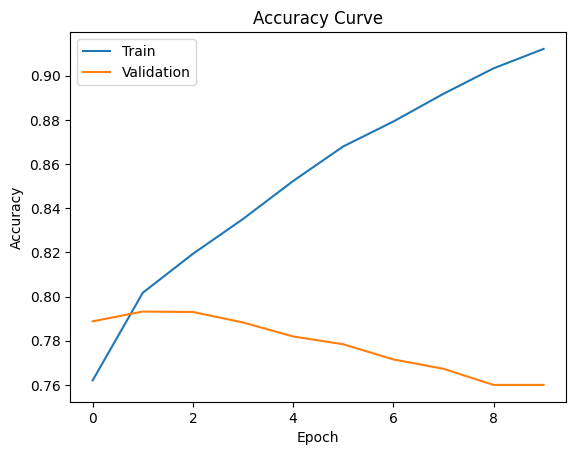

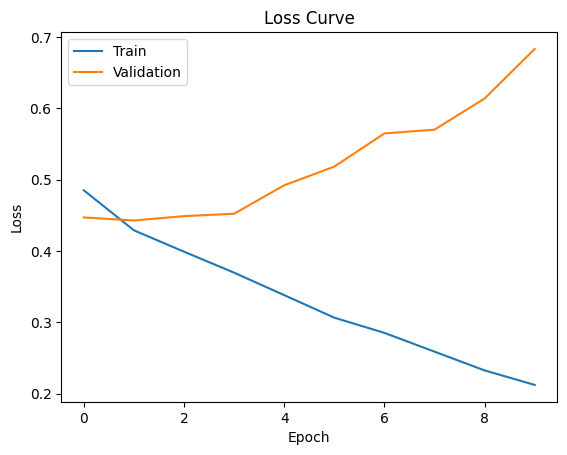

In [31]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()


###2.9 Confusion Matrix

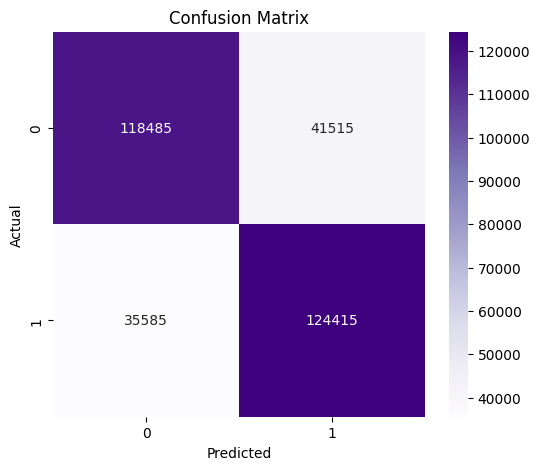

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
